In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('salary.xlsx')

In [ ]:
data

In [3]:
#importing sklearn library for linear regression

from sklearn.linear_model import LinearRegression

In [4]:
#importing sklearn library for train test split

from sklearn.model_selection import train_test_split

In [8]:
#split the data into independent and dependent variable

X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [11]:
X.shape, y.shape

((40, 1), (40,))

In [17]:
X.isnull().sum()

exp_yrs    0
dtype: int64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [23]:
X_train.shape, y_train.shape

((32, 1), (32,))

In [24]:
X_test.shape, y_test.shape

((8, 1), (8,))

In [25]:
lr = LinearRegression()

In [26]:
lr.fit(X_train,y_train)

LinearRegression()

In [27]:
y_pred = lr.predict(X_test)

In [28]:
#importing Linear regression measuring parameters

from sklearn.metrics import mean_squared_error,r2_score

In [50]:
mse = mean_squared_error(y_pred,y_test)
mse

31984365.916561738

In [51]:
r2 = r2_score(y_pred,y_test)
r2

0.9475706096718925

In [33]:
n,p = X.shape

In [39]:
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

In [40]:
adjusted_r2

0.9461908888737844

Lets do cross validation in linear regression

In [41]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [42]:
lr_model = LinearRegression()

In [58]:
scores = cross_val_score(lr_model,X_train,y_train,cv=5,scoring='r2')

In [64]:
scores = cross_val_score(lr_model,X,y,cv=15,scoring='r2')

In [59]:
print( scores)
print( np.mean(scores))

[0.94857265 0.91996392 0.92580051 0.97660316 0.92299609]
0.9387872650354675


In [65]:
print( scores)
print( np.mean(scores))

[-6.67194402e+00 -3.01997840e+00  2.72759786e-01 -5.53425922e-01
 -2.61274542e-02 -1.99843230e+02 -1.06111492e+01  2.16669764e-01
 -5.61960331e-01 -3.45141678e+01 -5.01816652e+00 -6.53844404e+01
 -4.32073817e+00 -1.57355115e+00 -1.98207130e+02]
-35.32110528313538


In [104]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score,cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, r2_score

# Create the dataset
data = {
    'exp_yrs': [1.1, 1.2, 1.3, 1.5, 2.0, 2.2, 2.5, 2.9, 3.0, 3.2, 3.2, 3.5, 3.7, 3.8, 3.9, 4.0, 4.0, 4.1, 4.3, 4.5, 4.7, 4.9, 5.1, 5.3, 5.5, 5.9, 6.0, 6.2, 6.5, 6.8, 7.1, 7.9, 8.2, 8.5, 8.7, 9.0, 9.5, 9.6, 10.3, 10.5],
    'Salary': [39343, 42774, 46205, 37731, 43525, 39891, 48266, 56642, 60150, 54445, 64445, 60000, 57189, 60200, 63218, 55794, 56957, 57081, 59095, 61111, 64500, 67938, 66029, 83088, 82200, 81363, 93940, 91000, 90000, 91738, 98273, 101302, 113812, 111620, 109431, 105582, 116969, 112635, 122391, 121872]
}

df = pd.DataFrame(data)

# Features and target
X = df[['exp_yrs']]
y = df['Salary']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Linear Regression model
model = LinearRegression()

# Perform cross-validation with r2 as the scoring metric
#scores = cross_val_score(model, X, y, cv=5, scoring=['r2', 'neg_mean_squared_error'])
scores = cross_validate(model, X, y, scoring=['r2', 'neg_mean_squared_error'], cv=5)

# Output the R^2 scores
print("R^2 scores:", scores['test_r2'])
print("Mean R^2 score:", scores['test_r2'].mean())

# Output the mean_squared scores
print("mean_squared scores:", scores['test_neg_mean_squared_error']*-1)
print("avg mean_squared score:", (scores['test_neg_mean_squared_error']*-1).mean())

R^2 scores: [ 0.15031087 -1.24990374 -0.01020364  0.12442657  0.14448258]
Mean R^2 score: -0.1681774709230405
mean_squared scores: [27803450.16478345 23631911.94590048 64691437.58611725 37115066.92476259
 25646862.89227303]
avg mean_squared score: 35777745.90276737


In [99]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# Generate some data
X, y = make_regression(n_samples=100, n_features=2, noise=0.1)

# Create a model
model = LinearRegression()

# Perform cross-validation with multiple scoring metrics
scores = cross_validate(model, X, y, scoring=['r2', 'neg_mean_squared_error'], cv=5)

# Display the results
print("R^2 scores:", scores['test_r2'])
print("Negative Mean Squared Error scores:", scores['test_neg_mean_squared_error'])


R^2 scores: [0.99999703 0.99999482 0.99999777 0.99999727 0.99998994]
Negative Mean Squared Error scores: [-0.0078072  -0.01051995 -0.00810471 -0.00617488 -0.01419418]


In [89]:
df_combined = pd.concat([X_train, y_train])

In [90]:
df_combined.to_excel('combined_temp.xlsx')

In [88]:
X_test

,exp_yrs
19,4.5
16,4.0
15,4.0
26,6.0
4,2.0
12,3.7
37,9.6
27,6.2


In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Create the dataset
data = {
    'exp_yrs': [1.1, 1.2, 1.3, 1.5, 2.0, 2.2, 2.5, 2.9, 3.0, 3.2, 3.2, 3.5, 3.7, 3.8, 3.9, 4.0, 4.0, 4.1, 4.3, 4.5, 4.7, 4.9, 5.1, 5.3, 5.5, 5.9, 6.0, 6.2, 6.5, 6.8, 7.1, 7.9, 8.2, 8.5, 8.7, 9.0, 9.5, 9.6, 10.3, 10.5],
    'Salary': [39343, 42774, 46205, 37731, 43525, 39891, 48266, 56642, 60150, 54445, 64445, 60000, 57189, 60200, 63218, 55794, 56957, 57081, 59095, 61111, 64500, 67938, 66029, 83088, 82200, 81363, 93940, 91000, 90000, 91738, 98273, 101302, 113812, 111620, 109431, 105582, 116969, 112635, 122391, 121872]
}

df = pd.DataFrame(data)

# Features and target
X = df[['exp_yrs']]
y = df['Salary']

# Train-test split with 20% test size and random state of 4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=4)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model using R^2 score
r2 = r2_score(y_test, y_pred)

# Output the results
print("R^2 score:", r2)

R^2 score: 0.8768010919580471


Cross-validated R^2 scores: [-6.67194402 -3.43456789 -4.91888044 ... -0.34711372 -0.48949597
 -0.26753381]
Mean R^2 score: -0.7317260840440457


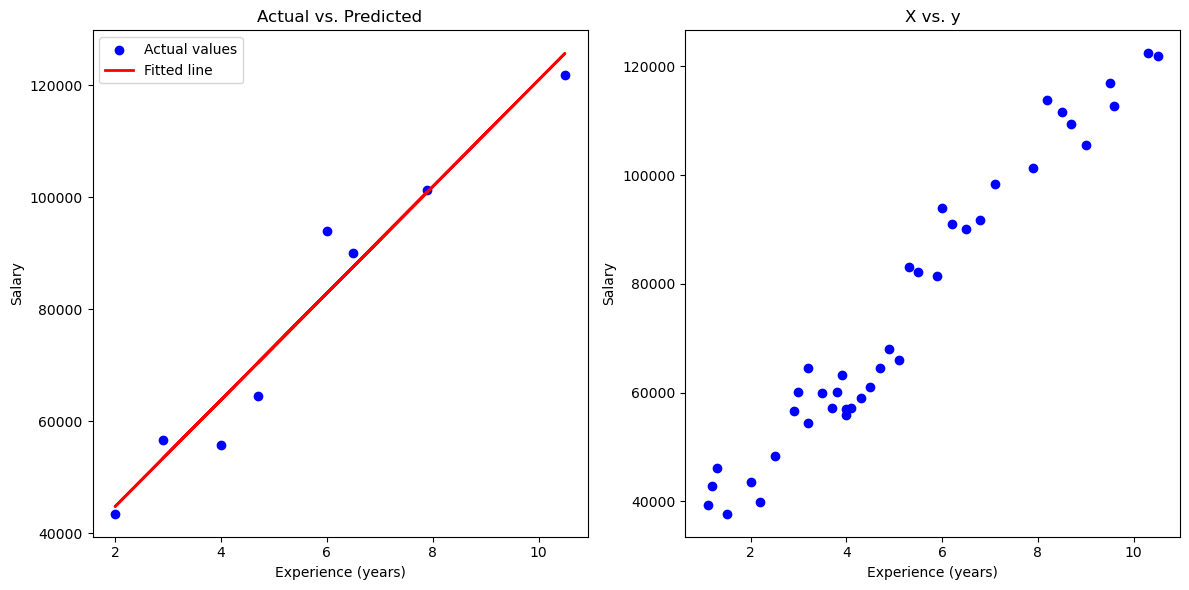

In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score,LeaveOneOut,LeavePOut
from sklearn.linear_model import LinearRegression

# Data Preparation
data = {
    'exp_yrs': [1.1, 1.2, 1.3, 1.5, 2.0, 2.2, 2.5, 2.9, 3.0, 3.2, 3.2, 3.5, 3.7, 3.8, 3.9, 4.0, 4.0, 4.1, 4.3, 4.5, 4.7, 4.9, 5.1, 5.3, 5.5, 5.9, 6.0, 6.2, 6.5, 6.8, 7.1, 7.9, 8.2, 8.5, 8.7, 9.0, 9.5, 9.6, 10.3, 10.5],
    'Salary': [39343, 42774, 46205, 37731, 43525, 39891, 48266, 56642, 60150, 54445, 64445, 60000, 57189, 60200, 63218, 55794, 56957, 57081, 59095, 61111, 64500, 67938, 66029, 83088, 82200, 81363, 93940, 91000, 90000, 91738, 98273, 101302, 113812, 111620, 109431, 105582, 116969, 112635, 122391, 121872]
}

df = pd.DataFrame(data)
X = df[['exp_yrs']]
y = df['Salary']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Initialize Linear Regression model
model = LinearRegression()

# Perform cross-validation
lpo = LeavePOut(p=3)
cv_scores = cross_val_score(model, X, y, cv=lpo, scoring='r2')
print(f'Cross-validated R^2 scores: {cv_scores}')
print(f'Mean R^2 score: {cv_scores.mean()}')

# Fit model on training data
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))

# Plot for actual vs. predicted
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='blue', label='Actual values')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Fitted line')
plt.xlabel('Experience (years)')
plt.ylabel('Salary')
plt.title('Actual vs. Predicted')
plt.legend()

# Plot for X vs. y
plt.subplot(1, 2, 2)
plt.scatter(X, y, color='blue', label='Actual values')
plt.xlabel('Experience (years)')
plt.ylabel('Salary')
plt.title('X vs. y')

plt.tight_layout()
plt.show()


Lets do the linear regression with new set of data. but this time we will compare the data with Lasso and Ridge regression results. 

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score,LeaveOneOut,LeavePOut,cross_val_predict, KFold
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

In [131]:
X, y = make_regression(n_samples=1000,n_features=1,n_targets=1, noise=70, random_state=12)

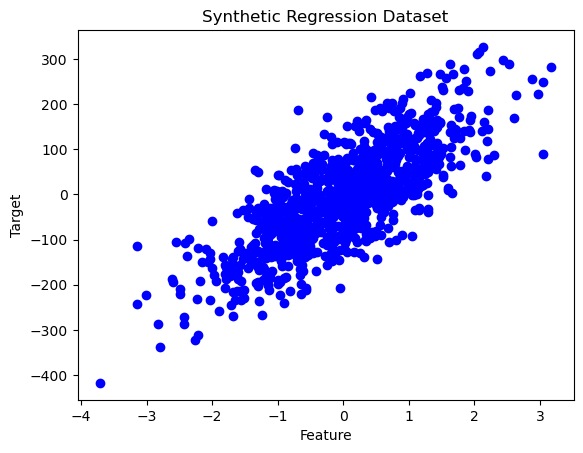

In [153]:
plt.scatter(X, y, color='blue')
plt.title("Synthetic Regression Dataset")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.show()

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12 )

In [124]:
lr  = LinearRegression()

In [134]:
lr.fit(X_train,y_train)

LinearRegression()

In [137]:
lr.coef_

array([82.81165327])

In [138]:
lr.intercept_

-3.416436546246525

In [140]:
y_pred = lr.predict(X_test)

In [145]:
mean_squared_error(y_test,y_pred)

4772.09442478167

In [146]:
r2_score(y_test,y_pred)

0.6059802328254674

In [154]:
#lets do it with cross validation and compare the score

kf = KFold(5,shuffle=True, random_state= 12)

cv_scores_r2 = cross_val_score(lr, X, y, cv=kf , scoring='r2')
cv_scores_mse = cross_val_score(lr, X, y, cv=kf , scoring='neg_mean_squared_error')

mean_squared_error = -cv_scores_mse
print(f'Cross-validated R^2 scores: {cv_scores_r2}')
print(f'Mean R^2 score: {cv_scores_r2.mean()}')
print(f'Cross-validated mse scores: {mean_squared_error}')
print(f'Mean mse score: {mean_squared_error.mean()}')

Cross-validated R^2 scores: [0.60598023 0.68200176 0.58927425 0.55749251 0.59039572]
Mean R^2 score: 0.6050288966956273
Cross-validated mse scores: [4772.09442478 4172.09086115 4717.4521325  5332.18862029 4847.36236963]
Mean mse score: 4768.2376816691085


In [183]:
#after doing the cross validation the r squared value and mse are staying the same and it is lower, So we can go ahead ad try using the ridge and lasso for improvement.

from sklearn.linear_model import Lasso,Ridge, LassoCV,RidgeCV
alphas = np.logspace(-4, 4, 50)
lasso_alpha_cv_model = LassoCV(alphas=alphas, cv=5, random_state=12)
lasso_alpha_cv_model.fit(X,y)

best_alpha = lasso_alpha_cv_model.alpha_
print(f"Best alpha value: {best_alpha}")
lasso_reg =  Lasso(alpha=best_alpha)

Best alpha value: 719.6856730011514


In [184]:
kf_lasso = KFold(n_splits=5, shuffle=True, random_state=12)

cv_scores_r2_lasso = cross_val_score(lasso_reg,X,y,cv=kf_lasso,scoring='r2')
cv_scores_mse_lasso = cross_val_score(lasso_reg,X,y,cv=kf_lasso,scoring='neg_mean_squared_error')

mean_squared_error_lasso = -cv_scores_mse_lasso


print(f'Cross-validated R^2 scores: {cv_scores_r2_lasso}')
print(f'Mean R^2 score: {cv_scores_r2_lasso.mean()}')
print(f'Cross-validated mse scores: {mean_squared_error_lasso}')
print(f'Mean mse score: {mean_squared_error_lasso.mean()}')

Cross-validated R^2 scores: [0.87721068 0.95127684 0.96395264 0.95623308 0.93846175]
Mean R^2 score: 0.9374269988553232
Cross-validated mse scores: [34091710.20701592 34514641.11645913 24207940.30835146 38299438.15964711
 29067978.52360433]
Mean mse score: 32036341.663015585


In [200]:
def best_model(model,X_data,y_data,model_name,no_of_splits = 5, random_state_value = 12):
    
    k_fold = KFold(n_splits=no_of_splits, shuffle=True, random_state=random_state_value)
    cv_scores_r2 = cross_val_score(model,X_data,y_data,cv=k_fold,scoring='r2')
    cv_scores_mse = cross_val_score(model,X_data,y_data,cv=k_fold,scoring='neg_mean_squared_error')

    mean_squared_error = -cv_scores_mse


    print(f'{model_name} Cross-validated R^2 scores: {cv_scores_r2}')
    print(f'{model_name} Mean R^2 score: {cv_scores_r2.mean()}')
    print(f'{model_name} Cross-validated mse scores: {mean_squared_error}')
    print(f'{model_name} Mean mse score: {mean_squared_error.mean()}')

In [201]:
alphas = np.logspace(-4, 4, 50)
lasso_alpha_cv_model = LassoCV(alphas=alphas, cv=5, random_state=12)
lasso_alpha_cv_model.fit(X,y)
best_alpha = lasso_alpha_cv_model.alpha_
print(f"Best alpha value: {best_alpha}")
lasso_reg =  Lasso(alpha=best_alpha)

lasso_out = best_model(lasso_reg,X,y,'Lasso Reg')

Best alpha value: 719.6856730011514
Lasso Reg Cross-validated R^2 scores: [0.87721068 0.95127684 0.96395264 0.95623308 0.93846175]
Lasso Reg Mean R^2 score: 0.9374269988553232
Lasso Reg Cross-validated mse scores: [34091710.20701592 34514641.11645913 24207940.30835146 38299438.15964711
 29067978.52360433]
Lasso Reg Mean mse score: 32036341.663015585


In [196]:
linear_out = best_model(LinearRegression(),X,y,'Linear Reg')

Linear Reg Cross-validated R^2 scores: [0.88071802 0.9494389  0.9631696  0.95806764 0.93660068]
Linear Reg Mean R^2 score: 0.9375989693372917
Linear Reg Cross-validated mse scores: [33117918.51462679 35816602.6728508  24733795.67606314 36694058.81411336
 29947067.90764222]
Linear Reg Mean mse score: 32061888.717059262


In [199]:
alphas = np.logspace(-4, 4, 50)
ridge_alpha_cv_model = RidgeCV(alphas=alphas, cv=5)
ridge_alpha_cv_model.fit(X,y)
best_alpha = ridge_alpha_cv_model.alpha_
print(f"Best alpha value: {best_alpha}")
ridge_reg =  Ridge(alpha=best_alpha)

ridge_out = best_model(ridge_reg,X,y,'Ridge Reg')

Best alpha value: 3.727593720314938
Lasso Reg Cross-validated R^2 scores: [0.87543241 0.95211978 0.96426091 0.95525692 0.93931413]
Lasso Reg Mean R^2 score: 0.9372768302000077
Lasso Reg Cross-validated mse scores: [34585438.28844088 33917512.81462795 24000914.79292279 39153653.97444432
 28665354.74563959]
Lasso Reg Mean mse score: 32064574.92321511


In [213]:
def alpha(model_type):
    selected_model = find_alpha(model_type)
    selected_model.fit(X,y)
    best_alpha = ridge_alpha_cv_model.alpha_
    print(f"Best alpha value: {best_alpha}")
    return best_alpha
    
def find_alpha(model_type):
    alphas = np.logspace(-4, 4, 50)
    if model_type == 'lasso Reg':
        temp  = LassoCV(alphas=alphas, cv=5, random_state=12)
    elif model_type == 'ridge Reg':
        temp  = RidgeCV(alphas=alphas, cv=5)
    return temp

In [223]:
def best_model(model,X_data,y_data,model_name,no_of_splits = 5, random_state_value = 12):
    
    k_fold = KFold(n_splits=no_of_splits, shuffle=True, random_state=random_state_value)
    cv_scores_r2 = cross_val_score(model,X_data,y_data,cv=k_fold,scoring='r2')
    cv_scores_mse = cross_val_score(model,X_data,y_data,cv=k_fold,scoring='neg_mean_squared_error')

    mean_squared_error = -cv_scores_mse


    print(f'{model_name} Cross-validated R^2 scores: {cv_scores_r2}')
    print(f'{model_name} Mean R^2 score: {cv_scores_r2.mean()}')
    print(f'{model_name} Cross-validated mse scores: {mean_squared_error}')
    print(f'{model_name} Mean mse score: {mean_squared_error.mean()}')

In [224]:
ridge_out = best_model(Ridge(alpha=alpha('ridge Reg')),X,y,'ridge Reg')

Best alpha value: 3.727593720314938
ridge Reg Cross-validated R^2 scores: [0.87543241 0.95211978 0.96426091 0.95525692 0.93931413]
ridge Reg Mean R^2 score: 0.9372768302000077
ridge Reg Cross-validated mse scores: [34585438.28844088 33917512.81462795 24000914.79292279 39153653.97444432
 28665354.74563959]
ridge Reg Mean mse score: 32064574.92321511


In [216]:
lasso_out = best_model(Lasso(alpha=alpha('lasso Reg')),X,y,'lasso Reg')

Best alpha value: 3.727593720314938
lasso Reg Cross-validated R^2 scores: [0.88070014 0.94944938 0.96317433 0.95805881 0.93661124]
lasso Reg Mean R^2 score: 0.9375987803302902
lasso Reg Cross-validated mse scores: [33122883.26206559 35809182.05187695 24730623.12827552 36701781.51654325
 29942078.76566606]
lasso Reg Mean mse score: 32061309.744885474


In [217]:
linear_out = best_model(LinearRegression(),X,y,'Linear Reg')

Linear Reg Cross-validated R^2 scores: [0.88071802 0.9494389  0.9631696  0.95806764 0.93660068]
Linear Reg Mean R^2 score: 0.9375989693372917
Linear Reg Cross-validated mse scores: [33117918.51462679 35816602.6728508  24733795.67606314 36694058.81411336
 29947067.90764222]
Linear Reg Mean mse score: 32061888.717059262
